# Foundation of Data Analysis - WS24

## Lab Assignment - Supervised Learning (Template)

**Due date: 9:45am on 11.12.2024**

This jupyter notebook serves as a template for the supervised lab assignment for you to work in. Please consult the exam sheet (supervised_lab_ws24.pdf) that you can find on Moodle for all the tasks as well as rules and regulations pertaining the assignment. Most importantly, you are only allowed to use the libraries/functions imported in the first code cell (for some tasks you are limited to fewer libraries - please see the instructions). The comments atop each cell are reminders of the tasks but do not replace the instructions in the pdf (the latter is binding).

Do not hesitate to email me (Christoph Luther) at christoph.luther@univie.ac.at or post on the discussion forum on Moodle with any questions you may have.

Do not forget to set random seeds for reproducibility whenever necessary. Good luck!

In [1]:
!pip install -r requirements.txt
# I couldn't install Python 3.10.14 on Windows, so I installed Python 3.10.15 instead.
#I already installed the requirements from the requirements.txt in the Anaconda prompt virtual environment
# but just in case, I wrote it again in the Jupyter notebook file.

In [2]:
import sys
print(sys.version)

3.10.15 | packaged by Anaconda, Inc. | (main, Oct  3 2024, 07:22:19) [MSC v.1929 64 bit (AMD64)]


In [3]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, zero_one_loss, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

## 1) Cross Validation for Random Forests

In [4]:
# 1.0 Load the data
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

In [5]:
# 1.1 Print first ten rows
print(train.head(10))
print(test.head(10))

         X1        X2  Y
0  0.942786  2.513357  0
1  0.001826 -0.171908  1
2 -0.225599 -1.572651  1
3  0.551667 -0.279003  1
4  0.789346  2.178841  0
5  0.697576 -0.435335  0
6  0.787238  1.960758  0
7  1.226155  0.932646  0
8 -0.177914  0.668113  1
9  0.740864  0.516436  0
         X1        X2  Y
0  0.746595  0.158083  1
1  1.151004  2.058918  0
2  0.281682 -0.035885  0
3  1.676774 -0.876130  1
4  1.524547  0.787678  0
5  1.059846  0.479412  0
6  1.380703  0.785319  0
7  0.755129 -0.201487  0
8  1.094355  1.100385  0
9 -0.653829 -0.129614  1


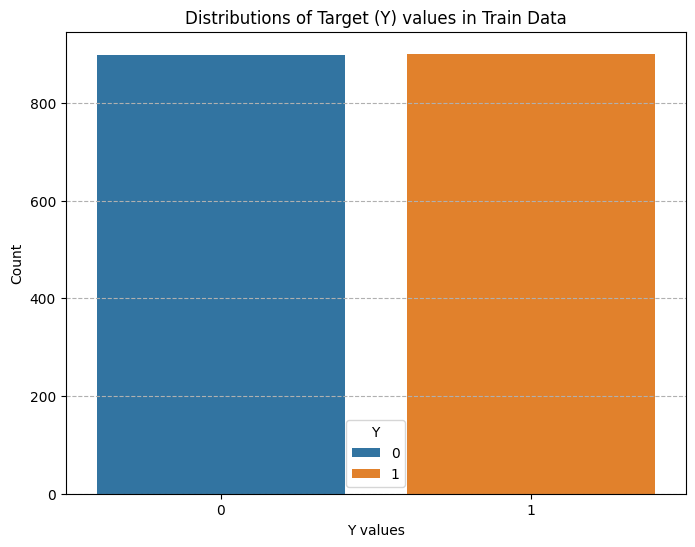

In [6]:
# 1.2 Target value evenly distributed?
plt.figure(figsize=(8, 6))
sns.countplot(x='Y', data=train, hue='Y')
plt.title('Distributions of Target (Y) values in Train Data', fontsize=12)
plt.xlabel('Y values', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.show()

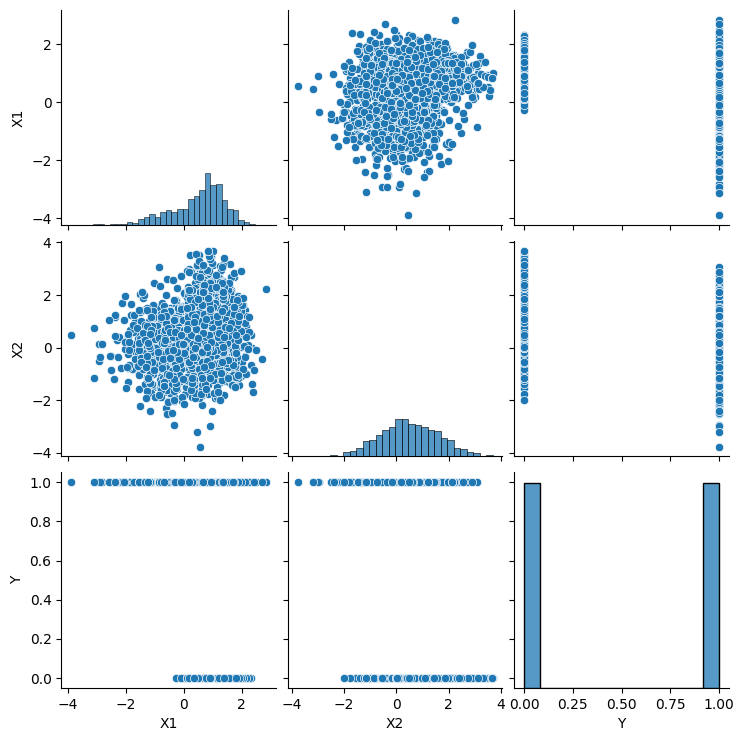

In [7]:
# 1.3 Pairplot
sns.pairplot(train)
plt.show()

In [8]:
# 1.4 Perform random forest

X_train=train[['X1', 'X2']]
X_test=test[['X1', 'X2']]
Y_train=train['Y']
Y_test=test['Y']

rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train, Y_train)

train_pred=rfc.predict(X_train)
test_pred=rfc.predict(X_test)

train_accu=accuracy_score(Y_train,train_pred)
test_accu=accuracy_score(Y_test,test_pred)

print(f"Train Acc: {train_accu:.3f}")
print(f"Test Acc: {test_accu:.3f}")


# Reference : https://jofresh.tistory.com/164

Train Acc: 0.999
Test Acc: 0.790


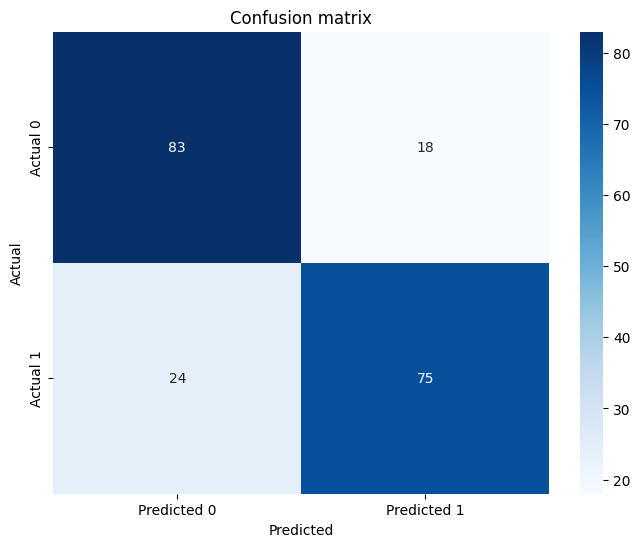

In [ ]:
# 1.5 Confusion matrix
test_pred=rfc.predict(X_test)
cm=confusion_matrix(Y_test, test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d",cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Reference : https://url.kr/r2a7m1

In [10]:
# 1.6 0-1 loss from the confusion matrix

def lossrisk(cm):
    TN, FP, FN, TP=cm.ravel()
    risk= (FP + FN) / (TP + TN + FP + FN)
    
    return risk
    
#1.4 (subtask4)
X_train=train[['X1', 'X2']]
X_test=test[['X1', 'X2']]
Y_train=train['Y']
Y_test=test['Y']

rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train, Y_train)

train_pred=rfc.predict(X_train)
test_pred=rfc.predict(X_test)

train_accuracy=accuracy_score(Y_train,train_pred)
test_accuracy=accuracy_score(Y_test,test_pred)

#print(f"Train Acc: {train_accuracy:.3f}")
#print(f"Test Acc: {test_accuracy:.3f}")

#Calculate confusion matrix (subtask5)
cm=confusion_matrix(Y_test, test_pred)

#Calculate model risk
risk= lossrisk(cm)

#Print model risk
print(f"Model Risk based on 0-1 loss function:{risk:.4f}")


Model Risk based on 0-1 loss function:0.2100


C:\Users\LG\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


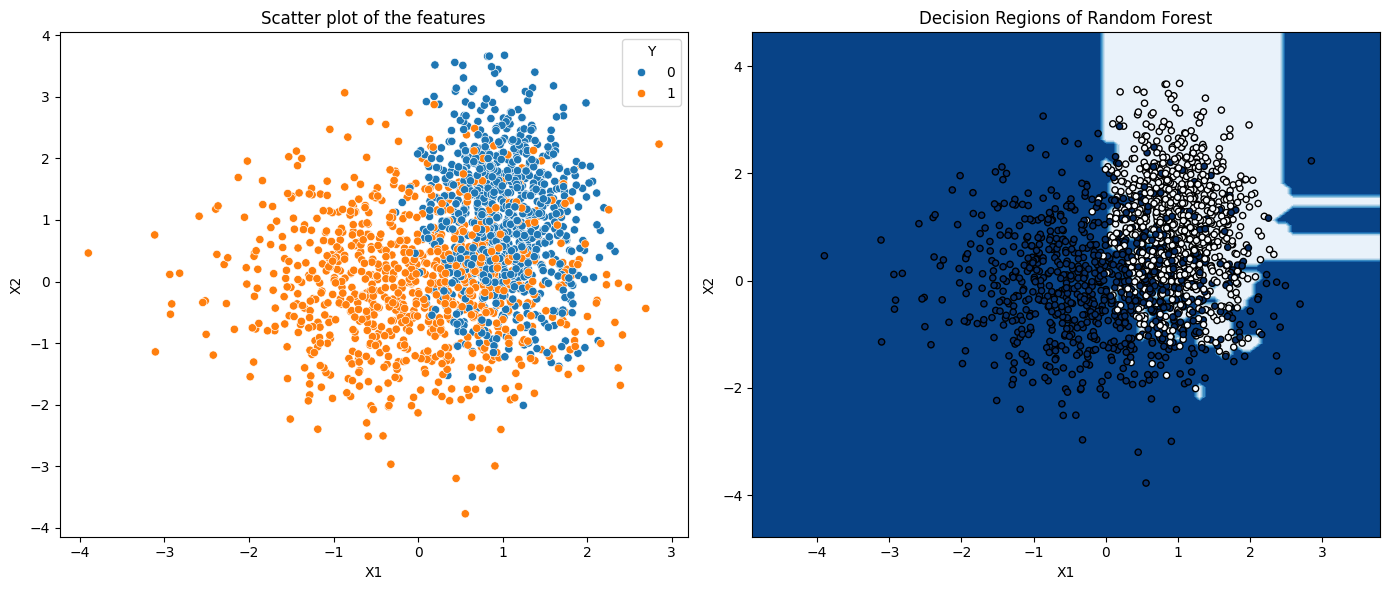

In [11]:
# 1.7 Scatter and decision regions

fig, axes=plt.subplots(1,2,figsize=(14, 6))

#Left subplot:Scatter plot of features coloured by target (train data)
sns.scatterplot(x='X1', y='X2', hue='Y', data=train, ax=axes[0])
axes[0].set_title('Scatter plot of the features', fontsize=12)
axes[0].set_xlabel('X1',fontsize=10)
axes[0].set_ylabel('X2',fontsize=10)


#Right subplot :  the decision regions of the random forest from subtask 4.
#Set the range for the x and y axes with additional margin
x_start=X_train.iloc[:,0].min()-1  
x_end=X_train.iloc[:,0].max()+1  
y_start=X_train.iloc[:,1].min()-1 
y_end=X_train.iloc[:,1].max()+1  

# Generate grid points for visualizing decision boundaries
x=np.arange(x_start, x_end, 0.1)
y=np.arange(y_start, y_end, 0.1)
x1, y1=np.meshgrid(x, y)

#Predict decision regions
decision_r=rfc.predict(np.c_[x1.ravel(), y1.ravel()])
decision_r=decision_r.reshape(x1.shape)

axes[1].contourf(x1, y1, decision_r, alpha=1, cmap='Blues')
axes[1].scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=Y_train, s=20, edgecolor='k', cmap='Blues')
axes[1].set_title('Decision Regions of Random Forest', fontsize=12)
axes[1].set_xlabel('X1', fontsize=10)
axes[1].set_ylabel('X2', fontsize=10)

plt.tight_layout()
plt.show()

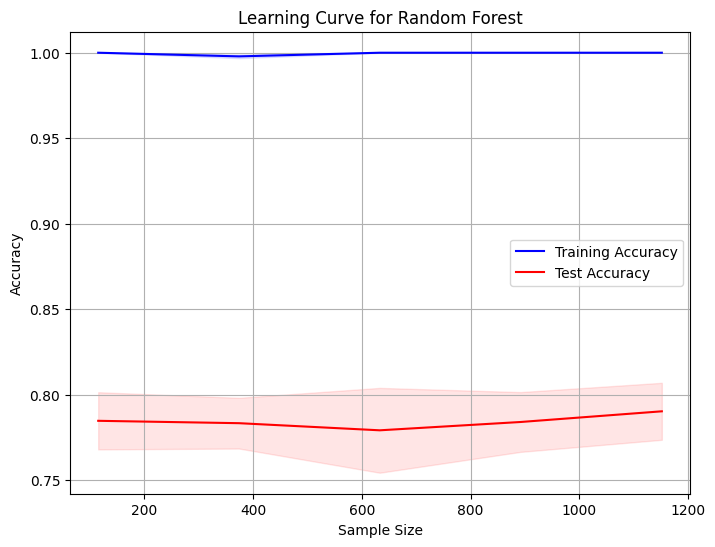

In [12]:
# 1.8 Learning Curve

X_train=train[['X1', 'X2']]
X_test=test[['X1', 'X2']]
Y_train=train['Y']
Y_test=test['Y']

# Split data (80% training, 20% validation)
X_train, X_test, y_train, y_test=train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

# Initialize Random Forest
rfc = RandomForestClassifier(random_state=0)

# Compute learning curve
train_sizes, train_scores, test_scores=learning_curve(
    rfc, X_train, y_train, 
    cv=5,  # 5-fold cross-validation
    train_sizes=np.linspace(0.1, 1.0, 5),  # Training size: 10% ~ 100%
    scoring='accuracy', )

# Calculate mean accuracy
train_acc_mean=train_scores.mean(axis=1)
train_acc_std=train_scores.std(axis=1)
test_acc_mean=test_scores.mean(axis=1)
test_acc_std=test_scores.std(axis=1)

# visualize
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_acc_mean, label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_acc_mean, label="Test Accuracy", color="red")

# shaded regions representing standard deviation
plt.fill_between(train_sizes, train_acc_mean-train_acc_std, train_acc_mean+train_acc_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_acc_mean-test_acc_std, test_acc_mean+test_acc_std, alpha=0.1, color="red")

plt.title('Learning Curve for Random Forest', fontsize=12)
plt.xlabel('Sample Size', fontsize=10)  
plt.ylabel('Accuracy', fontsize=10)
plt.legend(loc="best")
plt.grid()

plt.show()

# Reference : https://273k.tistory.com/entry/Learning-Curves

In [ ]:
# 1.9 Explain problem
#The training accuarcy is 1.0, and the consistent difference between the training error and the validation error indicates overfitting. 
#To address this, the model's hypothesis complexity should be reduced, or the number of samples (data) should be increased.

In [ ]:
# 1.10 Cross validation

#X_train=train[['X1', 'X2']]
#X_test=test[['X1', 'X2']]
#Y_train=train['Y']
#Y_test=test['Y']

# 0-1 loss from the confusion matrix from subtask6
def lossrisk(cm):
    TN, FP, FN, TP = cm.ravel()  
    risk = (FP + FN) / (TP + TN + FP + FN)
    return risk
    
# Convert DataFrame to NumPy arrays to avoid warning about feature names
X_train=train[['X1', 'X2']].values  #Convert DataFrame to NumPy array
X_test=test[['X1', 'X2']].values    
Y_train=train['Y']
Y_test=test['Y']

depth_1 = [1, 2, 3, 5, 10, 20]

def k_fold_cv(X, Y, depth_1):
    K=10  # 10-fold cross-validation
    num_samples=len(X)
    fold_size=num_samples // K #size of each fold
    best_depth = None
    best_avg_loss=float('inf')
    per_loss={}
    
    for depth in depth_1:
        total_loss=0
        for fold in range(K):
            # Split data into training and validation sets
            start=fold*fold_size
            end=(fold+1)*fold_size
            
            # Split data into training and validation sets for the current fold
            X_val = []
            Y_val = []
            X_train = []
            Y_train = []
            
            for i in range(start, end):
                X_val.append(X[i])
                Y_val.append(Y[i])
            for i in range(0, start):
                X_train.append(X[i])
                Y_train.append(Y[i])
            for i in range(end, len(X)):
                X_train.append(X[i])
                Y_train.append(Y[i])
                
            X_val=np.array(X_val)
            Y_val=np.array(Y_val)
            X_train=np.array(X_train)
            Y_train=np.array(Y_train)


            # Train a Random Forest model
            model=RandomForestClassifier(max_depth=depth, random_state=0)
            model.fit(X_train, Y_train)

            # Evaluate the model on the validation set
            Y_pred=model.predict(X_val)
            
            #calcualte 0-1 loss using confusion matrix
            cm=confusion_matrix(Y_val, Y_pred)
            fold_loss=lossrisk(cm) 
            total_loss+=fold_loss

        # Calculate the average loss for this depth
        avg_loss=total_loss/ K
        per_loss[depth]=avg_loss

        print(f"Depth: {depth}, Avg Loss: {avg_loss:.3f}")

        #Update the best depth if the current one is better
        if avg_loss<best_avg_loss:
            best_avg_loss=avg_loss
            best_depth=depth

    return best_depth, best_avg_loss,per_loss


X = train[['X1', 'X2']].values  
Y = train['Y']   

depth_1 = [1, 2, 3, 5, 10, 20]

best_depth, best_loss, depth_losses=k_fold_cv(X, Y, depth_1)

print("Best Depth:", best_depth)
print(f"Best Loss: {best_loss:.3f}")

# Reference1 : https://scikit-learn.org/stable/modules/cross_validation.html
# Reference2 : https://velog.io/@73syjs/Model-Selection-K-fold-Cross-Validation
# Referenced Algorithm 1 from 'fda_lab_supervised_ws24.pdf' for the K-fold cross-validation implementation.

Depth: 1, Avg Loss: 0.212
Depth: 2, Avg Loss: 0.199
Depth: 3, Avg Loss: 0.197
Depth: 5, Avg Loss: 0.191
Depth: 10, Avg Loss: 0.203
Depth: 20, Avg Loss: 0.207
Best Depth: 5
Best Loss: 0.191


In [14]:
# 1.11 Train best
# Example dataset (you can replace it with your actual dataset)
X=train[['X1', 'X2']].values  
Y=train['Y']

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=0)

# Assuming the best max_depth was found in the previous task (e.g., max_depth=10)
best_max_depth=5  # This is the best max_depth from task 10

# Train the model using the complete training dataset
rfc1=RandomForestClassifier(max_depth=best_max_depth, random_state=0)
rfc1.fit(X_train, Y_train)

# Evaluate the model on the test data using 0-1 loss
Y_test_pred=rfc1.predict(X_test)
test_risk=zero_one_loss(Y_test, Y_test_pred)

# Output the results
print(f"Test 0-1 loss: {test_risk:.3f}")

Test 0-1 loss: 0.189


In [15]:
# 1.12 Compare avg nodes and depth

X = train[['X1', 'X2']].values  
Y = train['Y']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# RandomForest from subtask4
rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train, Y_train)

# Get nodes and depths (subtask4)
#'tree_.node_count', 'tree_.max_depth' is an attribute provided by Scikit-learn
nodes_4=[tree.tree_.node_count for tree in rfc.estimators_]
depths_4=[tree.tree_.max_depth for tree in rfc.estimators_]

# Best max_depth from subtask11
best_max_depth=5

# Train the first RandomForest with max_depth=10
rfc_1=RandomForestClassifier(max_depth=best_max_depth, random_state=0)
rfc_1.fit(X_train, Y_train)

# Get nodes and depths (subtask11)
nodes_11=[tree.tree_.node_count for tree in rfc_1.estimators_]
depth_11=[tree.tree_.max_depth for tree in rfc_1.estimators_]


# Calculate the averages
avg_nodes_11=np.mean(nodes_11)
avg_depth_11=np.mean(depth_11)
avg_nodes_4=np.mean(nodes_4)
avg_depth_4=np.mean(depths_4)

# Print the results for comparison
print(f"subtask4 model Average nodes per tree: {avg_nodes_4:.2f}, Average depth per tree: {avg_depth_4:.2f}")
print(f"subtask11 model (max_depth=5) - Avg. nodes per tree: {avg_nodes_11:.2f}, Avg. depth per tree: {avg_depth_11:.2f}")


subtask4 model Average nodes per tree: 426.90, Average depth per tree: 21.71
subtask11 model (max_depth=5) - Avg. nodes per tree: 48.16, Avg. depth per tree: 5.00


In [ ]:
# 1.13 Comparison of model performance

# The model from Subtask 11 is simpler and has a structure that is less prone to overfitting, 
# -making it more likely to perform better on the test data.
# In contrast, the model from Subtask 4 has a more complex structure, which increases the risk of overfitting, 
# potentially leading to poorer performance on new data.


In [ ]:
# 1.14 Pruning

#Pruning is a technique to reduce the complexity of decision trees to prevent overfitting.
#It removes less important nodes, resulting in a simpler tree structure. This reduces the model's size, increases prediction speed, and enhances generalization performance.
#Random Forest is an ensemble learning method that uses multiple decision trees.
#By combining multiple trees, it achieves higher accuracy than a single tree.The performance is improved through majority voting or averaging among the trees.


## 2) On Linear Separability

In [16]:
# 2.0 Load data
df1 = pd.read_csv("data_xor.csv")
df2 = pd.read_csv("data_sphere.csv")

print(df1.head(10))
print(df2.head(10))

         X1        X2  Y
0  0.205455 -0.268401  0
1  1.571849 -0.244808  1
2 -0.039003 -0.260825  0
3  2.110029  2.180076  0
4  1.743564  1.773831  0
5  0.306558  2.281872  1
6  0.099301 -0.364417  0
7  1.799000 -0.011264  1
8  2.220993  1.952981  0
9  1.959889  0.171973  1
         X1        X2        X3  Y
0 -0.192479 -0.093953  0.021378  0
1  3.141492 -3.732198 -0.336472  1
2 -0.087825 -0.503373  0.254212  0
3  0.405339  0.323145  0.108954  0
4 -0.341697  4.299232  2.177826  1
5 -3.309556  3.662483  0.486430  1
6  2.782375 -3.281227  2.476203  1
7 -0.408256 -0.063482 -0.385316  0
8  3.989117 -1.850726  2.304467  1
9  0.052605  0.299010  0.055505  0


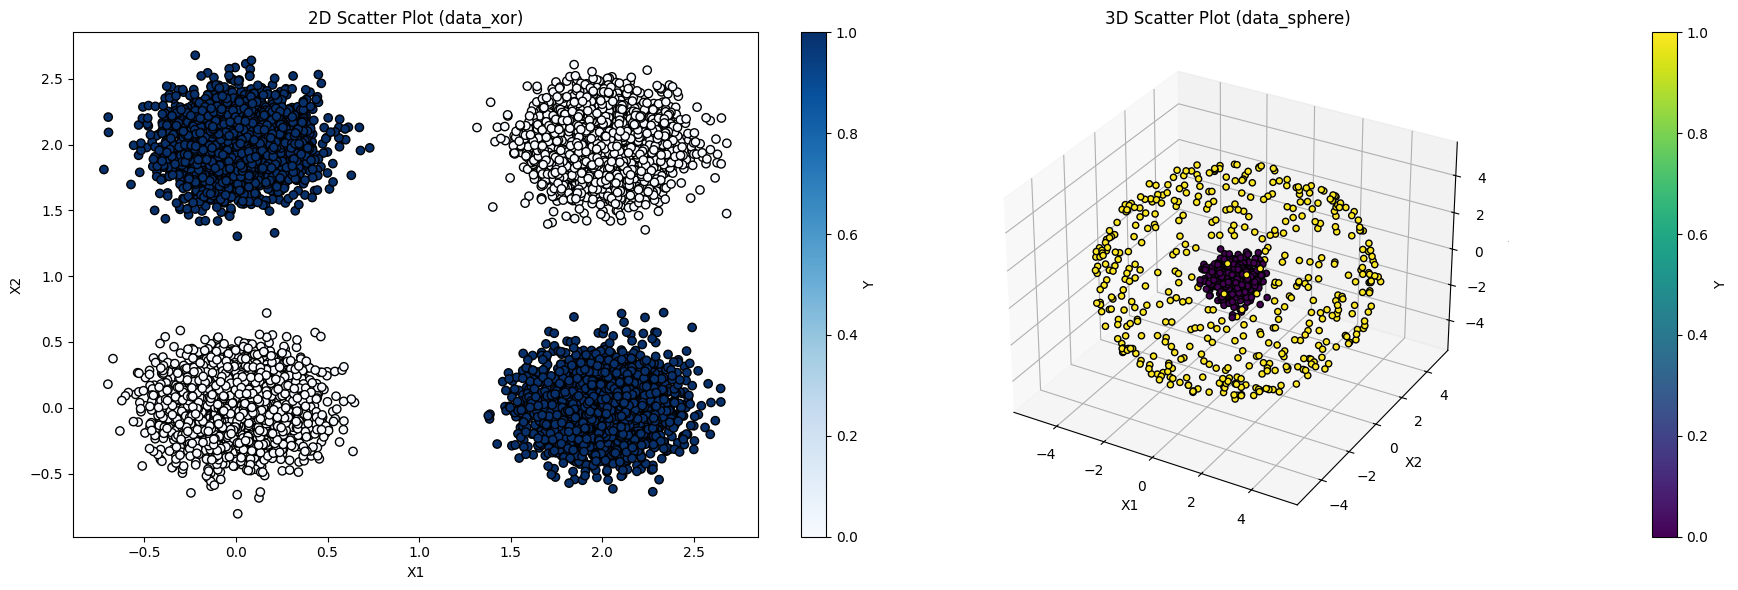

In [17]:
# 2.1 Scatter plots

fig=plt.figure(figsize=(18, 6))

#data_xor 2D 
ax1=fig.add_subplot(1, 2, 1)
scatter1=ax1.scatter(df1["X1"], df1["X2"], c=df1["Y"], cmap="Blues", edgecolor="k", alpha=1)
ax1.set_title("2D Scatter Plot (data_xor)", fontsize=12)
ax1.set_xlabel("X1", fontsize=10)
ax1.set_ylabel("X2", fontsize=10)
plt.colorbar(scatter1, ax=ax1, label="Y")

#data_sphere 3D 
ax2=fig.add_subplot(1, 2, 2, projection="3d")  
scatter2=ax2.scatter(df2["X1"], df2["X2"], df2["X3"], c=df2["Y"], cmap="viridis", edgecolor="k", alpha=1)
ax2.set_title("3D Scatter Plot (data_sphere)", fontsize=12)
ax2.set_xlabel("X1",fontsize=10)
ax2.set_ylabel("X2",fontsize=10)
ax2.set_zlabel("X3",fontsize=1)
plt.colorbar(scatter2, ax=ax2, pad=0.2, label="Y")
plt.tight_layout()
plt.show()


In [18]:
# 2.2 Logistic Regressions

#XOR 
X_xor=df1[['X1', 'X2']]
Y_xor=df1['Y']

#test_size=0.2 means 20% of the data will be used for validation, and 80% for training.
#random_state=42 is used to control the randomness.
X_xor_train, X_xor_val, Y_xor_train, Y_xor_val=train_test_split(X_xor, Y_xor, test_size=0.2, random_state=42 )


# Sphere
X_sphere = df2[['X1', 'X2', 'X3']]
Y_sphere = df2['Y']
X_sphere_train, X_sphere_val, Y_sphere_train, Y_sphere_val=train_test_split(X_sphere, Y_sphere, test_size=0.2, random_state=42)


#logistic Regression model for XOR data
xor_model=LogisticRegression(random_state=42)
xor_model.fit(X_xor_train, Y_xor_train)
Y_xor_pred=xor_model.predict(X_xor_val)
xor_accuracy=accuracy_score(Y_xor_val, Y_xor_pred)

#Logistic Regresssion model for Sphere data
sphere_model=LogisticRegression(random_state=42)
sphere_model.fit(X_sphere_train, Y_sphere_train)
Y_sphere_pred=sphere_model.predict(X_sphere_val)
sphere_accuracy=accuracy_score(Y_sphere_val, Y_sphere_pred)


print(f"XOR Accuracy: {xor_accuracy:.3f}")
print(f"Sphere Accuracy: {sphere_accuracy:.3f}")

XOR Accuracy: 0.261
Sphere Accuracy: 0.530


In [ ]:
# 2.3 Interpret

# XOR Dataset: 
# - Data is not linearly separable.
# - Logistic regression couldn't perform well, resulting in a low accuracy of 26.1%.

# Sphere Dataset: 
# - Spherical, nonlinear nature of the data caused logistic regression to underperform.
# - Spherical data is easier to separate than XOR data, leading to a higher accuracy of 53.0%.

# Conclusion:
# - Both datasets have nonlinear structures.
# - Logistic regression is not suitable because it's a linear model.
# - A more appropriate model would be one that can learn nonlinear boundaries, such as kernel methods.

In [19]:
# 2.4 Classify data_xor

X_xor=df1[['X1', 'X2']]
Y_xor=df1['Y']

# 20% of the data will be used for validation, and 80% for training.
#random_state=42 is used to control the randomness.
X_train, X_test, Y_train, Y_test = train_test_split(X_xor, Y_xor, test_size=0.2, random_state=42)

# Kernel Types : Linear, Poly, RBF
kernels=['linear', 'poly', 'rbf']

#Train and evaluate models for each kernel
for kernel in kernels:
    
    svm_model=SVC(kernel=kernel, random_state=42)
    
    #training the model
    svm_model.fit(X_train, Y_train)
    
    Y_pred=svm_model.predict(X_test)
    
    accuracy=accuracy_score(Y_test, Y_pred)
    
    print(f"Accuracy of {kernel} kernel on XOR dataset: {accuracy:.4f}")

Accuracy of linear kernel on XOR dataset: 0.4930
Accuracy of poly kernel on XOR dataset: 0.9995
Accuracy of rbf kernel on XOR dataset: 1.0000


Accuracy of linear kernel on Sphere dataset: 0.6250
Accuracy of poly kernel on Sphere dataset: 0.6850
Accuracy of rbf kernel on Sphere dataset: 1.0000


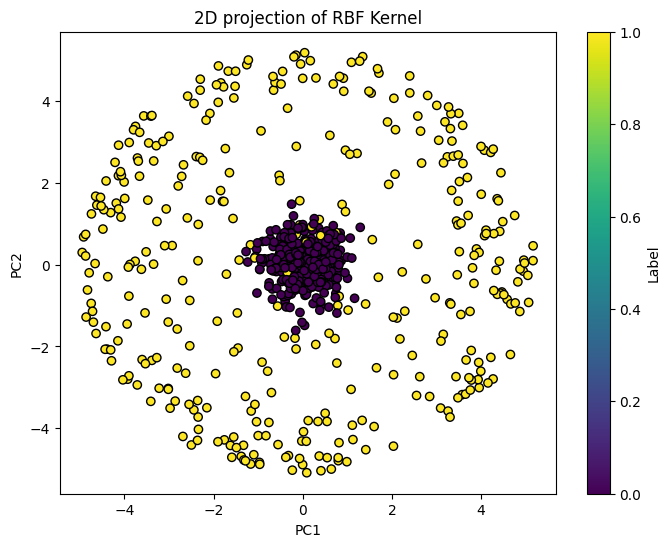

In [ ]:
# 2.5 Classify sphere

X_sp=df2[['X1', 'X2','X3']]
Y_sp=df2['Y']

# 20% of the data will be used for validation, and 80% for training.
#random_state=42 is used to control the randomness.
X_train, X_test, Y_train, Y_test = train_test_split(X_sp, Y_sp, test_size=0.2, random_state=42)

# Kernel Types : Linear, Poly, RBF
kernels=['linear', 'poly', 'rbf']

#Train and evaluate models for each kernel
for kernel in kernels:
    
    svm_model=SVC(kernel=kernel, random_state=42)
    
    #training the model
    svm_model.fit(X_train, Y_train)
    
    Y_pred=svm_model.predict(X_test)
    
    accuracy=accuracy_score(Y_test, Y_pred)
    
    print(f"Accuracy of {kernel} kernel on Sphere dataset: {accuracy:.4f}")
#RBF achieves 100 acuuarcy

# 2D projection for visualization (e.g., dimensionality reduction with PCA)

# PCA is part of the scikit-learn library, which is included in the provided requirements.txt
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X_train_2D=pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=Y_train, cmap="viridis", edgecolor="k", alpha=1)
plt.title("2D projection of RBF Kernel", fontsize=12)

# Principal Component 1 (PC1) and Principal Component 2 (PC2) represent the new axes that capture the largest variances in the data, combining the original features X1, X2, X3.
plt.xlabel("PC1") 
plt.ylabel("PC2")
plt.colorbar(label="Label")
plt.show()

#Reference : https://todayisbetterthanyesterday.tistory.com/16

In [ ]:
# 2.6 Explanation of what was done

# Using the RBF kernel, non-linearly separable data is mapped to a higher-dimensional space.
# In this transformed high-dimensional space, the data becomes linearly separable.
# The SVM then identifies the optimal hyperplane that perfectly separates the data, achieving 100% accuracy.

# PCA transforms the original feature space into a new space,
# making it easier to separate the data within that space.


In [ ]:
# 2.7 Kernel trick and kernel svm

# Kernel Support Vector Machines (SVMs) map data into a higher-dimensional space,enabling the separation of non-linearly separable data in a linear manner.

# The kernel trick efficiently handles computations by calculating inner products in the transformed space without explicitly transforming the data into a higher dimension.
# Various kernel functions, such as the RBF kernel, are commonly used.
# Kernel SVMs are highly effective at recognizing non-linear patterns, achieving high accuracy in many tasks.


In [32]:
# 2.8 KernelSVM

#Sphere
X_sphere=df2[['X1', 'X2', 'X3']]
Y_sphere=df2['Y']

X_train, X_test, Y_train, Y_test=train_test_split(X_sphere, Y_sphere,test_size=0.2, random_state=42)

# SVM rbf kernel
svm_model=SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, Y_train)

Y_pred=svm_model.predict(X_test)
accuracy=accuracy_score(Y_test, Y_pred)

print(f"Accuracy of SVM for Sphere dataset: {accuracy:.3f}")

Accuracy of SVM for Sphere dataset: 1.000
